In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, root_mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor

In [2]:
# load the data into a dataframe
df = pd.read_csv('./vsc_hvdc_dataset.csv')

In [ ]:
# # peek at the data
# cols = df.columns

# for col in cols:
#     print(f'{col} min: {df[col].min()} max: {df[col].max()}')

In [4]:

input_scaler = MinMaxScaler(feature_range=(-1, 1))
output_scaler = MinMaxScaler(feature_range=(-1, 1))
# df = scaler.fit_transform(df)
    

In [5]:
# separate input and output features/columns
X = df.filter(regex='^scenario_', axis=1)
y = df.filter(regex='^solution_', axis=1)

In [6]:
X_scaled = input_scaler.fit_transform(X)
y_scaled = output_scaler.fit_transform(y)

In [7]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=37)

In [8]:
# train a simple multiple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_train)

In [10]:
rmse = root_mean_squared_error(y_train, y_pred, multioutput='raw_values')

print("RMSE for each output feature:")
for name, value in zip(y.columns, rmse):
    print(f"{name}: {value}")


RMSE for each output feature:
solution_N_vw1: 0.2468863934501513
solution_N_vw2: 0.2604023463948348
solution_Qcab1_interm: 0.1900481332035748
solution_Qcab2_interm: 0.16295896066707294
solution_Qf1_interm: 0.2085789737193029
solution_Qf2: 0.16857239575024674
solution_Rdc: 0.3005129324755251
solution_Vac1: 0.22196082376212437
solution_Vac2: 0.22663783047688513
solution_Vdc1: 0.21951060440568104
solution_Xtr1_pu: 0.318136936255762
solution_Xtr2_pu: 0.3201768432971118
solution_ucab1: 0.0
solution_ucab2: 0.06897257147875145
solution_uf1: 0.09740547185945427
solution_uf2: 0.09738410062809819
solution_w1: 0.3877434108148498
solution_w2: 0.3733273221494469


In [11]:
# train an xgboost regression model
xgb_model = MultiOutputRegressor(XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=37))
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = root_mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')


RMSE for each output feature:
solution_N_vw1: 0.255629306392224
solution_N_vw2: 0.2598131545899038
solution_Qcab1_interm: 0.23777022239716147
solution_Qcab2_interm: 0.15516717208733116
solution_Qf1_interm: 0.1305665070833776
solution_Qf2: 0.2527121670534652
solution_Rdc: 0.3297053510890191
solution_Vac1: 0.28757930340790944
solution_Vac2: 0.28039801983005785
solution_Vdc1: 0.164002963323279
solution_Xtr1_pu: 0.36261855320552516
solution_Xtr2_pu: 0.34282863810109643
solution_ucab1: 0.0
solution_ucab2: 2.980232238769531e-07
solution_uf1: 0.24350236750718415
solution_uf2: 0.3450476180488391
solution_w1: 0.4293190757729777
solution_w2: 0.37229850531750486

R^2 Score for each output feature:
solution_N_vw1: -0.5763735260809455
solution_N_vw2: -0.3396816950776598
solution_Qcab1_interm: -0.1800240895088301
solution_Qcab2_interm: -0.1942577249253581
solution_Qf1_interm: -5.903589933380311
solution_Qf2: -2.5256217728083703
solution_Rdc: -0.25187174542862234
solution_Vac1: -0.25923029107625206
s

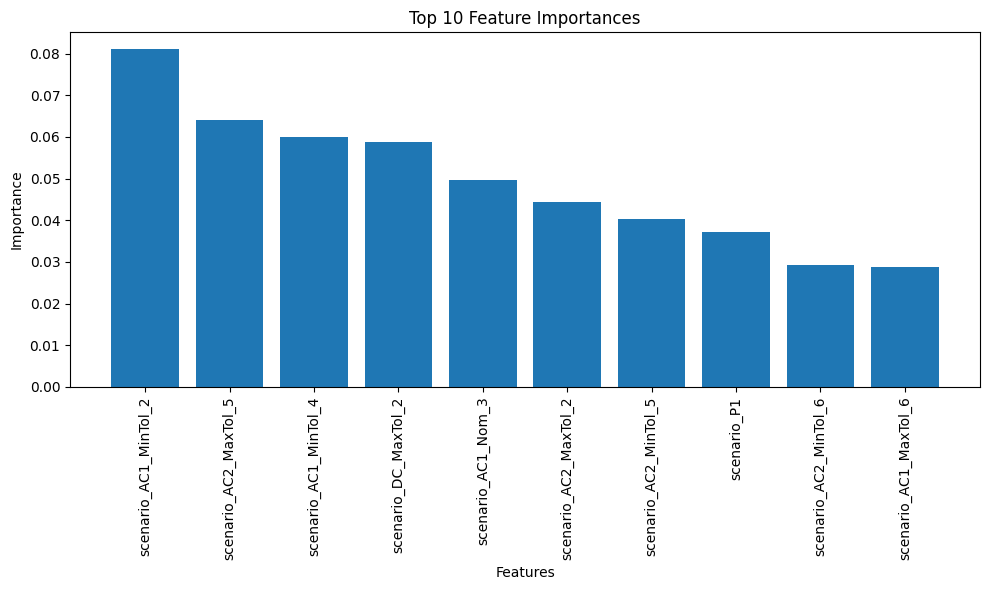

In [12]:
import matplotlib.pyplot as plt

print("RMSE for each output feature:")
for name, value in zip(y.columns, rmse):
    print(f"{name}: {value}")

print("\nR^2 Score for each output feature:")
for name, value in zip(y.columns, r2):
    print(f"{name}: {value}")


# feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': xgb_model.estimators_[0].feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [13]:
y_pred_rescaled = output_scaler.inverse_transform(y_pred)

In [19]:
np.set_printoptions(suppress=True)
print(np.array(y_pred_rescaled[:5]))

[[  416574.97         428350.44       21969000.         17618606.
  50694504.         48635580.                0.81260353   363939.22
    362374.22         318465.56              0.14327651        0.14271025
         1.                0.9999999         0.9999999         0.9999999
       298.16837         359.18936   ]
 [  416356.5          425737.38       20186002.         17224132.
  51161568.         47873168.                0.8083103    359634.66
    363695.7          318593.28              0.14597124        0.14289245
         1.                0.9999999         0.9999999         0.9999999
       299.31546         360.1739    ]
 [  415894.25         425804.44       20477188.         17370110.
  51257136.         49158564.                0.81565106   366893.66
    361453.16         318570.47              0.1427359         0.14246452
         1.                0.9999999         0.9999999         0.9999999
       300.12543         363.62482   ]
 [  416113.38         426031.78       21